In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad

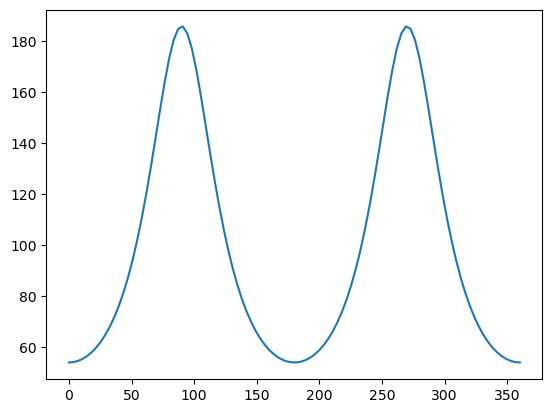

In [ ]:
def I(chi, C, eta, chi_0):
    numerator = 1 - eta**2
    denominator = (1 + eta)**2 - 4 * eta * np.cos(chi/180*np.pi - chi_0/180*np.pi)**2
    return C * numerator / denominator
#equation 1 from https://pubs.acs.org/doi/10.1021/acs.langmuir.6b01827
#Give angle chi in degrees, the equation converts to radians implicitly

# Test the function
C = 100
eta = 0.3
chi_0 = 90
chi = np.linspace(0, 360, 100)

I_values = I(chi, C, eta, chi_0)
plt.plot(chi, I_values)

In [43]:
# Import data from CSV, skipping the first two rows
csv_file_path = 'CNCaz/20951-5C30T-18.csv'
df = pd.read_csv(csv_file_path, skiprows=1)


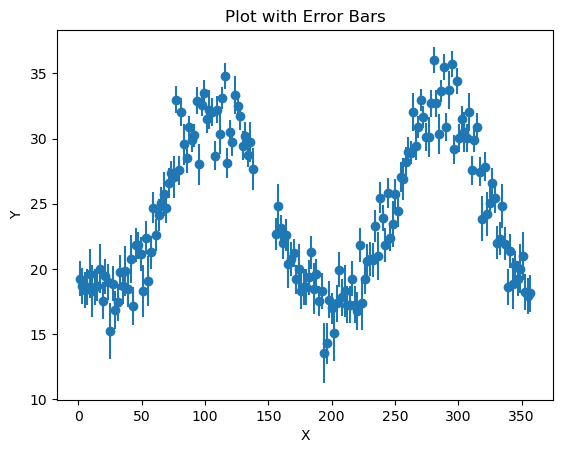

In [44]:
#remove zeroes from data
df_nz = df[df['Y'] != 0]

# Plot the data with error bars
plt.errorbar(df_nz['X'], df_nz['Y'], yerr=df_nz['dY'], fmt='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with Error Bars')
plt.show()

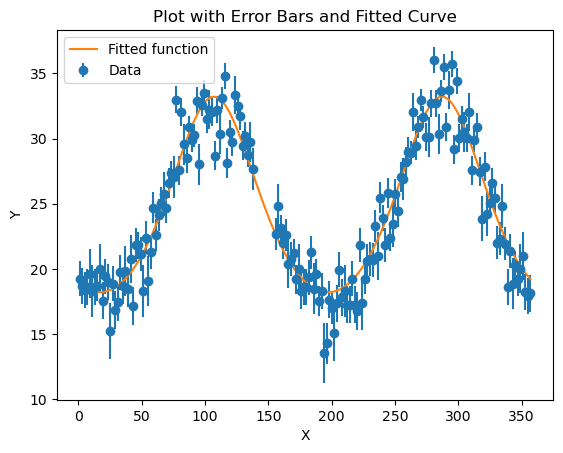

Fitted parameters ± standard deviation:
C: 24.595614977418986 ± 0.0971617828278527
eta: 0.14926545149846 ± 0.002645067798964254
chi_0: 107.01132823226605 ± 0.4865455597141959


In [45]:
# Fit the data to the function
chi_data = df_nz['X']
I_data = df_nz['Y']
dY_data = df_nz['dY']
initial_guess = [100, 0.3, 90]  # Initial guess for C, eta, chi_0

# Use absolute_sigma=True to treat dY_data as absolute errors
params, params_covariance = curve_fit(I, chi_data, I_data, p0=initial_guess, sigma=dY_data, absolute_sigma=True)

# Plot the data with error bars
plt.errorbar(df_nz['X'], df_nz['Y'], yerr=df_nz['dY'], fmt='o', label='Data')

# Plot the fitted curve
chi_fit = np.linspace(min(chi_data), max(chi_data), 100)
I_fit = I(chi_fit, *params)
plt.plot(chi_fit, I_fit, label='Fitted function')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot with Error Bars and Fitted Curve')
plt.legend()
plt.show()

# Print the fitted parameters and their uncertainties
print("Fitted parameters ± standard deviation:")
print(f"C: {params[0]} ± {np.sqrt(params_covariance[0, 0])}")
print(f"eta: {params[1]} ± {np.sqrt(params_covariance[1, 1])}")
print(f"chi_0: {params[2]} ± {np.sqrt(params_covariance[2, 2])}")

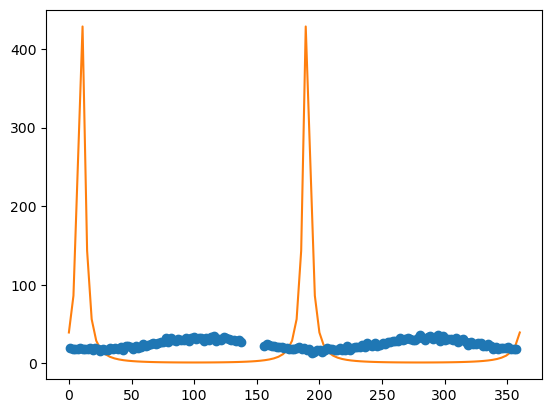

The value of S is 0.778967314616334.


In [72]:
# Define the function f(chi) based on the previous equation
def f(chi, C, eta, chi_0):
    # Convert chi and chi_0 from degrees to radians
    chi = np.radians(chi)
    chi_0 = np.radians(chi_0)
    
    numerator = 1 - eta**2
    denominator = (1 + eta)**2 - 4 * eta * np.cos(chi - chi_0)**2
    return C * numerator / denominator

# Define the integrand for the numerator
def integrand_numerator(chi, C, eta, chi_0):
    return f(chi, C, eta, chi_0) * (3 * np.cos(np.radians(chi))**2 - 1) / 2 * np.sin(np.radians(chi))

# Define the integrand for the denominator
def integrand_denominator(chi, C, eta, chi_0):
    return f(chi, C, eta, chi_0) * np.sin(np.radians(chi))

# Set the parameters
C = 24.595
eta = 0.9
chi_0 = 10  # in degrees

f_values = f(chi, C, eta, chi_0)
plt.errorbar(df_nz['X'], df_nz['Y'], yerr=df_nz['dY'], fmt='o', label='Data')
plt.plot(chi, f_values)
plt.show()

# Calculate the integrals
numerator_integral, _ = quad(integrand_numerator, 0, 90, args=(C, eta, chi_0))  # integrate from 0 to 90 degrees
denominator_integral, _ = quad(integrand_denominator, 0, 90, args=(C, eta, chi_0))  # integrate from 0 to 90 degrees

# Calculate S
S = numerator_integral / denominator_integral

print(f"The value of S is {S}.")

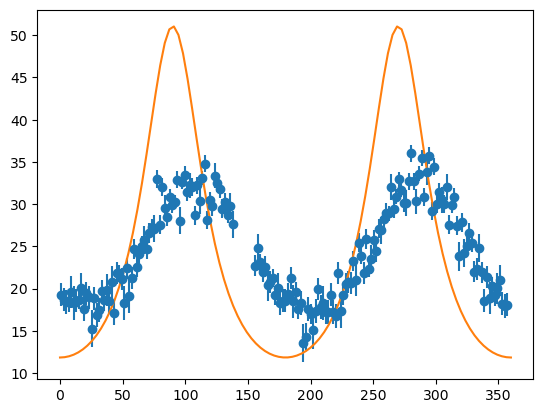

The value of S is -0.18144567597250927.


In [66]:
###########Use chi-90 degrees to check alignment in vertical direction

# Define the function f(chi) based on the previous equation
def f(chi, C, eta, chi_0):
    # Convert chi and chi_0 from degrees to radians
    chi = np.radians(chi)
    chi_0 = np.radians(chi_0)
    
    numerator = 1 - eta**2
    denominator = (1 + eta)**2 - 4 * eta * np.cos(chi - chi_0)**2
    return C * numerator / denominator

# Define the integrand for the numerator with substitution chi' = 180 degrees - chi
def integrand_numerator(chi, C, eta, chi_0):
    chi_prime = 180 - chi
    return f(chi_prime, C, eta, chi_0) * (3 * np.cos(np.radians(chi_prime))**2 - 1) / 2 * np.sin(np.radians(chi_prime))

# Define the integrand for the denominator with substitution chi' = 180 degrees - chi
def integrand_denominator(chi, C, eta, chi_0):
    chi_prime = 180 - chi
    return f(chi_prime, C, eta, chi_0) * np.sin(np.radians(chi_prime))

# Set the parameters
C = 24.595
eta = 0.35
chi_0 = -90  # in degrees

f_values = f(chi, C, eta, chi_0)
plt.errorbar(df_nz['X'], df_nz['Y'], yerr=df_nz['dY'], fmt='o', label='Data')
plt.plot(chi, f_values)
plt.show()

# Calculate the integrals
numerator_integral, _ = quad(integrand_numerator, 0, 90, args=(C, eta, chi_0))  # integrate from 0 to 90 degrees
denominator_integral, _ = quad(integrand_denominator, 0, 90, args=(C, eta, chi_0))  # integrate from 0 to 90 degrees

# Calculate S
S = numerator_integral / denominator_integral

print(f"The value of S is {S}.")